# Numerical solution of ODEs

First the necessary imports and the function definitions we need for this task.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# define the derivatives of y

def d_y(t, y):
    # first derivative of y
    return -y

def dd_y(t, y):
    # second derivative (for second order Taylor method)
    return y

# define y

def y(t):
    # y(t) (for error computations)
    return np.exp(-t)

***
a) Implement Euler's method and compute an approximation of $y(1)$ using a step size of $h=0.1$.
***

In [16]:
# Define Euler's method
def Euler(y0, T, f, h):
    """
        Euler(y0, T, f, h)
    
    Use Euler's method to approximate the solution of the ODE (scalar or system) y'(t) = f(t,y)
    
    Input:
        y0 - initial value y(0)
        f  - definition of the right-hand-side function
        T  - simulation time (starting at t=0, ending at t=T)
        h  - time-step size (fixed)
    Output:
        y  - array containing all discrete solution values y0,y1,y2,...
        t  - array containing all discrete time instants 0,h,2h,...
    """
    ys = [y0] #array where all y_n will be stored
    ts = [0]  #array where all t_n will be stored
    while(ts[-1] < T):
        t, y = ts[-1], ys[-1]
        ys.append(y + h*f(t, y))
        ts.append(t + h)
    return (np.array(ts), np.array(ys))

In [17]:
# y(1) for Euler's method
Euler(1., 1., d_y, 0.1)[1][-1]

np.float64(2.100000000000001)

***
b) Repeat this with the second order Taylor method and Heun's method.
***

In [18]:
# Define the second-order Taylor method
def Taylor2(y0, T, f, df, h):
    """
        Taylor2(y0, T, f, df, h)
    
    Use second-order Taylor method to approximate the solution of the ODE y'(t) = f(t,y)
    
    Input:
        y0 - initial value y(0)
        f  - definition of the right-hand-side function
        df - derivative of f with respect to y
        T  - simulation time (starting at t=0, ending at t=T)
        h  - time-step size (fixed)
    Output:
        y  - array containing all discrete solution values y0,y1,y2,...
        t  - array containing all discrete time instants 0,h,2h,...
    """
    ys = [y0]  # array where all y_n will be stored
    ts = [0]   # array where all t_n will be stored
    while(ts[-1] < T):
        t, y = ts[-1], ys[-1]
        ys.append(y + h*f(t, y) + (h**2/2)*df(t, y))
        ts.append(t + h)
    return (np.array(ts), np.array(ys))

In [19]:
# Define Heun's method
def Heun(y0, T, f, h):
    """
        Heun(y0, T, f, h)
    
    Use Heun's method to approximate the solution of the ODE y'(t) = f(t,y)
    
    Input:
        y0 - initial value y(0)
        f  - definition of the right-hand-side function
        T  - simulation time (starting at t=0, ending at t=T)
        h  - time-step size (fixed)
    Output:
        y  - array containing all discrete solution values y0,y1,y2,...
        t  - array containing all discrete time instants 0,h,2h,...
    """
    ys = [y0]  # array where all y_n will be stored
    ts = [0]   # array where all t_n will be stored
    while(ts[-1] < T):
        t, y = ts[-1], ys[-1]
        # Predictor step
        y_pred = y + h * f(t, y)
        # Corrector step
        ys.append(y + (h/2) * (f(t, y) + f(t + h, y_pred)))
        ts.append(t + h)
    return (np.array(ts), np.array(ys))

In [20]:
# approximate y(1) using the methods and h = 0.1

# exact value of y(1)
np.exp(-1.)

# y(1) for Euler's method
Euler(1., 1., d_y, 0.1)[1][-1]

# y(1) for Heun's method
Heun(1., 1., d_y, 0.1)[1][-1]

# y(1) for second order Taylor's method
Taylor2(1., 1., d_y, dd_y, 0.1)[1][-1]

np.float64(2.100000000000001)

***
d)  We now want to approximate the convergence orders of these methods numerically. Recall that we defined the global error,
	$$
		\epsilon_g := \max_i \lvert y(t_i) - y_i \rvert.
	$$
	If we assume that $\epsilon_g(h) \approx M h^p$, for some $M > 0$, we have,
	$$
		\log \bigg(\frac{\epsilon_g(h_1)}{\epsilon_g(h_2)} \bigg) \approx p \log \bigg(\frac{h_1}{h_2} \bigg).
	$$
	Compute the global error of the methods from a)-c) using $h_1 = 10^{-2}$ and $h_2 = 10^{-3}$, where $t_i = i h, i = 1, \dots, \frac{1}{h}$. Use this to approximate the convergence order, $p$, for each of the three methods.
***

In [21]:
# approximate convergence order for each method

h1 = 1e-2

h2 = 1e-3

# Euler's method
ts,ys = Euler(1., 1., d_y, h1)
e1 = np.linalg.norm(ys - y(ts), np.inf)
ts2,ys2 = Euler(1., 1., d_y, h2)
e2 = np.linalg.norm(ys2 - y(ts2), np.inf)
p_Euler = np.log(e1/e2) / np.log(h1/h2)
print(f"Euler's method convergence order: {p_Euler}")

# Heun's method
ts,ys = Heun(1., 1., d_y, h1)
e1 = np.linalg.norm(ys - y(ts), np.inf)
ts2,ys2 = Heun(1., 1., d_y, h2)
e2 = np.linalg.norm(ys2 - y(ts2), np.inf)
p_Heun = np.log(e1/e2) / np.log(h1/h2)
print(f"Heun's method convergence order: {p_Heun}")

# second order Taylor's method
ts,ys = Taylor2(1., 1., d_y, dd_y, h1)
e1 = np.linalg.norm(ys - y(ts), np.inf)
ts2,ys2 = Taylor2(1., 1., d_y, dd_y, h2)
e2 = np.linalg.norm(ys2 - y(ts2), np.inf)
p_Taylor2 = np.log(e1/e2) / np.log(h1/h2)
print(f"Second-order Taylor method convergence order: {p_Taylor2}")


***
e) We can also approximate the convergence order by plotting $\log(\epsilon_g(h)) = \log(M) + p \log(h)$ versus $\log(h)$, and inspecting the slope of the function.
Plot $\log(\epsilon_g(h))$ versus $\log(h)$ for $h = 10^{-2}, 10^{-3}, 10^{-4}$ for each of the three methods.
***

ValueError: x and y must have same first dimension, but have shapes (3,) and (0,)

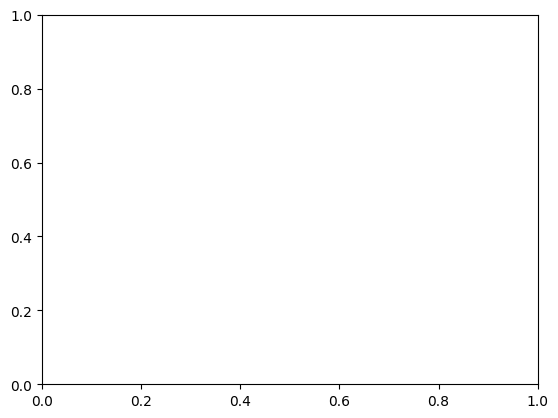

In [22]:
# plot log(error) versus log(h) 

# values of h
hs = [1e-2, 1e-3, 1e-4]

errors_Euler = []
errors_Heun = []
errors_Taylor2 = []
for h in hs:
    # Euler's method error
    ts, ys = Euler(1., 1., d_y, h)
    error = np.linalg.norm(ys - y(ts), np.inf)
    errors_Euler.append(error)
    
    # Heun's method error
    ts, ys = Heun(1., 1., d_y, h)
    error = np.linalg.norm(ys - y(ts), np.inf)
    errors_Heun.append(error)
    
    # second order Taylor method error
    ts, ys = Taylor2(1., 1., d_y, dd_y, h)
    error = np.linalg.norm(ys - y(ts), np.inf)
    errors_Taylor2.append(error)

# plot of Euler's method errors
plt.plot(np.log(hs), np.log(errors_Euler), label="Euler's method")

# plot of Heun's method errors
plt.plot(np.log(hs), np.log(errors_Heun), label="Heun's method")

# plot of second order Taylor error
plt.plot(np.log(hs), np.log(errors_Taylor2), label="Second-order Taylor method")

plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.legend()
plt.grid(True)